In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,log_loss,classification_report
from imblearn.over_sampling import SMOTE
import xgboost

In [2]:
attrition=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

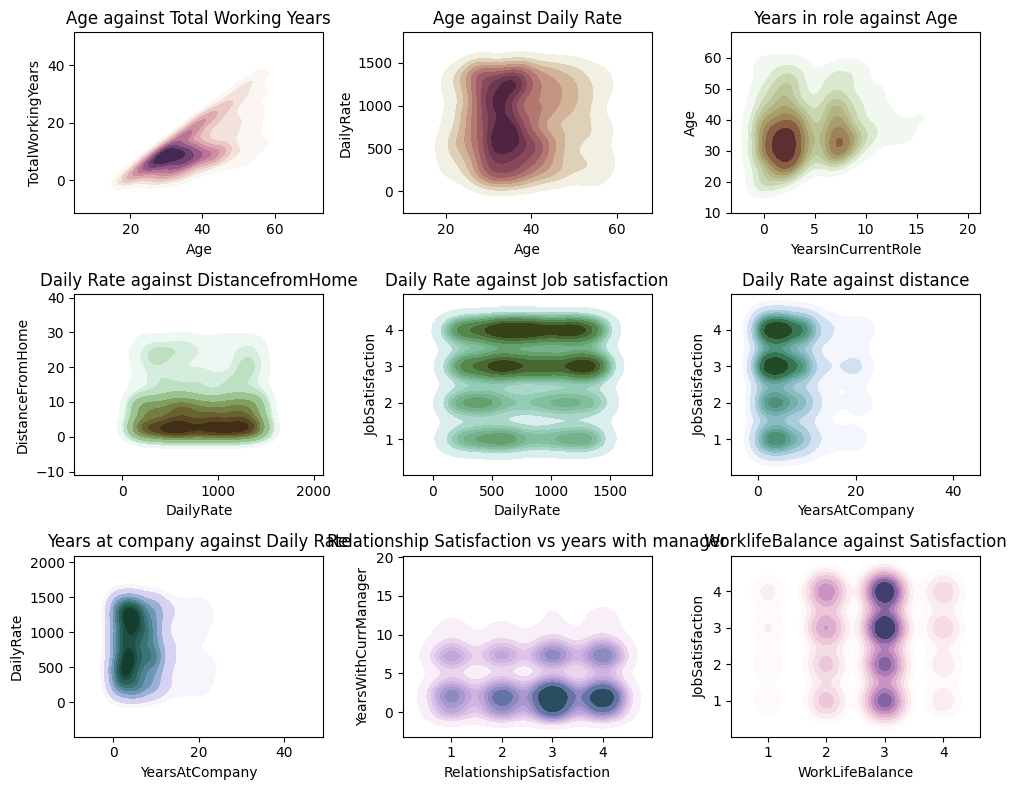

In [3]:
f,axes=plt.subplots(3,3,figsize=(10,8),sharex=False,sharey=False)
s=np.linspace(0,3,10)
cmap=sns.cubehelix_palette(start=0.0,light=1,as_cmap=True)
sns.kdeplot(x='Age', data=attrition,y='TotalWorkingYears', cmap=cmap, fill=True, cut=5, ax=axes[0,0])
axes[0,0].set(title='Age against Total Working Years')

cmap=sns.cubehelix_palette(start=0.33333,light=1,as_cmap=True)
sns.kdeplot(x='Age',y='DailyRate',data=attrition,cmap=cmap,fill=True,ax=axes[0,1])
axes[0,1].set(title='Age against Daily Rate')

cmap=sns.cubehelix_palette(start=0.66666,light=1,as_cmap=True)
sns.kdeplot(x='YearsInCurrentRole',y='Age',data=attrition,cmap=cmap,fill=True,ax=axes[0,2])
axes[0,2].set(title='Years in role against Age')

cmap=sns.cubehelix_palette(start=1.0,light=1,as_cmap=True)
sns.kdeplot(x='DailyRate',y='DistanceFromHome',data=attrition,cmap=cmap,fill=True,cut=5,ax=axes[1,0])
axes[1,0].set(title='Daily Rate against DistancefromHome')

cmap=sns.cubehelix_palette(start=1.33333,light=1,as_cmap=True)
sns.kdeplot(x='DailyRate',y='JobSatisfaction',data=attrition,cmap=cmap,fill=True,ax=axes[1,1])
axes[1,1].set(title='Daily Rate against Job satisfaction')

cmap=sns.cubehelix_palette(start=1.66666,light=1,as_cmap=True)
sns.kdeplot(x='YearsAtCompany',y='JobSatisfaction',data=attrition,cmap=cmap,fill=True,ax=axes[1,2])
axes[1,2].set(title='Daily Rate against distance')

cmap=sns.cubehelix_palette(start=2.0,light=1,as_cmap=True)
sns.kdeplot(x='YearsAtCompany',y='DailyRate',data=attrition,cmap=cmap,fill=True,cut=5,ax=axes[2,0])
axes[2,0].set(title='Years at company against Daily Rate')

cmap=sns.cubehelix_palette(start=2.33333,light=1,as_cmap=True)
sns.kdeplot(x='RelationshipSatisfaction',y='YearsWithCurrManager',data=attrition,cmap=cmap,fill=True,ax=axes[2,1])
axes[2,1].set(title='Relationship Satisfaction vs years with manager')

cmap=sns.cubehelix_palette(start=2.66666,light=1,as_cmap=True)
sns.kdeplot(x='WorkLifeBalance',y='JobSatisfaction',data=attrition,cmap=cmap,fill=True,ax=axes[2,2])
axes[2,2].set(title='WorklifeBalance against Satisfaction')

f.tight_layout()

In [4]:
target_map = {'Yes':1, 'No':0}
# Use the pandas apply method to numerically encode our attrition target variable
attrition["Attrition_numerical"] = attrition["Attrition"].apply(lambda x: target_map[x])

# creating a list of only numerical values
numerical = [u'Age', u'DailyRate', u'DistanceFromHome', 
             u'Education', u'EmployeeNumber', u'EnvironmentSatisfaction',
             u'HourlyRate', u'JobInvolvement', u'JobLevel', u'JobSatisfaction',
             u'MonthlyIncome', u'MonthlyRate', u'NumCompaniesWorked',
             u'PercentSalaryHike', u'PerformanceRating', u'RelationshipSatisfaction',
             u'StockOptionLevel', u'TotalWorkingYears',
             u'TrainingTimesLastYear', u'WorkLifeBalance', u'YearsAtCompany',
             u'YearsInCurrentRole', u'YearsSinceLastPromotion',u'YearsWithCurrManager']
numerical

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [5]:
data=[go.Heatmap(z=attrition[numerical].astype(float).corr().values,x=attrition[numerical].columns.values,y=attrition[numerical].columns.values,colorscale='Viridis',reversescale=True,opacity=1.0)]
layout=go.Layout(title='Pearson Correlation of numerical features',xaxis=dict(ticks='',nticks=36),yaxis=dict(ticks=''),width=900,height=700)

In [6]:
fig=go.Figure(data=data,layout=layout)
py.iplot(fig,filename='labelled-heatmap')

In [7]:
attrition = attrition.drop(['Attrition_numerical'], axis=1)

In [8]:
category =[]
for col,value in attrition.items():
    if value.dtype=='object':
        print(value)
        category.append(col)
numerical=attrition.columns.difference(category)
numerical

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object
0           Travel_Rarely
1       Travel_Frequently
2           Travel_Rarely
3       Travel_Frequently
4           Travel_Rarely
              ...        
1465    Travel_Frequently
1466        Travel_Rarely
1467        Travel_Rarely
1468    Travel_Frequently
1469        Travel_Rarely
Name: BusinessTravel, Length: 1470, dtype: object
0                        Sales
1       Research & Development
2       Research & Development
3       Research & Development
4       Research & Development
                 ...          
1465    Research & Development
1466    Research & Development
1467    Research & Development
1468                     Sales
1469    Research & Development
Name: Department, Length: 1470, dtype: object
0       Life Sciences
1       Life Sciences
2               Other
3       Life Sciences
4           

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [9]:
attrition_cat = attrition[category]
attrition_cat = attrition_cat.drop(['Attrition'], axis=1) # Dropping the target column
attrition_cat = pd.get_dummies(attrition_cat)
attrition_cat.head(3)
attrition_num = attrition[numerical]
attrition_final = pd.concat([attrition_num, attrition_cat], axis=1)
target_map = {'Yes':1, 'No':0}
# Use the pandas apply method to numerically encode our attrition target variable
target = attrition["Attrition"].apply(lambda x: target_map[x])

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

# Split data into train and test sets as well as for validation and testing
train, test, target_train, target_val = train_test_split(attrition_final, 
                                                         target, 
                                                         train_size= 0.80,
                                                         random_state=0);
#train, test, target_train, target_val = StratifiedShuffleSplit(attrition_final, target, random_state=0)

In [11]:
oversampler=SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_resample(train,target_train)

seed = 0   # We set our random seed to zero for reproducibility
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 1000,
#     'warm_start': True, 
    'max_features': 0.3,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

rf = RandomForestClassifier(**rf_params)
rf.fit(smote_train, smote_target)
rf_predictions = rf.predict(test)
print("Accuracy score: {}".format(accuracy_score(target_val, rf_predictions)))
print("="*80)
print(classification_report(target_val, rf_predictions))

Accuracy score: 0.8537414965986394
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       245
           1       0.57      0.49      0.53        49

    accuracy                           0.85       294
   macro avg       0.74      0.71      0.72       294
weighted avg       0.85      0.85      0.85       294



In [12]:
trace = go.Scatter(
    y = rf.feature_importances_,
    x = attrition_final.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = rf.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = attrition_final.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

In [25]:
import pickle
pickle.dump(rf,file='Model.pkl')

SyntaxError: positional argument follows keyword argument (45211279.py, line 2)